In [7]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [8]:
# Replace 'path/to/your/ml-100k/u.data' with the actual path to your downloaded dataset file
file_path = 'ml-100k\\u.data'

# Define the column names for the dataset
columns = ['user_id', 'item_id', 'rating', 'timestamp']

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path, sep='\t', names=columns)

# Define the Surprise Reader
reader = Reader(rating_scale=(1, 5))

# Load the dataset from the Pandas DataFrame
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)

In [9]:
# Use the KNNBasic algorithm with cosine similarity for the first model
sim_options_cosine = {'name': 'cosine', 'user_based': False}
model_cosine = KNNBasic(sim_options=sim_options_cosine)

In [10]:
# Use the KNNBasic algorithm with Pearson correlation for the second model
sim_options_pearson = {'name': 'pearson', 'user_based': False}
model_pearson = KNNBasic(sim_options=sim_options_pearson)

In [11]:
# Use the KNNBasic algorithm with item-item similarity matrix for the third model
sim_options_matrix = {'name': 'pearson', 'user_based': False}
model_matrix = KNNBasic(sim_options=sim_options_matrix, k=100)

In [12]:
# Load the data and fit the models
trainset = data.build_full_trainset()
model_cosine.fit(trainset)
model_pearson.fit(trainset)
model_matrix.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


In [ ]:
# Evaluate the models
testset = trainset.build_anti_testset()  # Use all ratings that are NOT in the training set
predictions_cosine = model_cosine.test(testset)
predictions_pearson = model_pearson.test(testset)
predictions_matrix = model_matrix.test(testset)

In [ ]:
# Function to calculate evaluation metrics
def calculate_metrics(predictions):
    true_labels = [prediction.r_ui for prediction in predictions]
    predicted_labels = [prediction.est for prediction in predictions]

    rmse = mean_squared_error(true_labels, predicted_labels, squared=False)
    mae = mean_absolute_error(true_labels, predicted_labels)

    return rmse, mae

In [ ]:
# Calculate metrics for each model
rmse_cosine, mae_cosine = calculate_metrics(predictions_cosine)
rmse_pearson, mae_pearson = calculate_metrics(predictions_pearson)
rmse_matrix, mae_matrix = calculate_metrics(predictions_matrix)

In [ ]:
# Store the RMSE and MAE values in a DataFrame
data = {
    'Model': ['Cosine Similarity', 'Pearson Correlation', 'Item-Item Similarity Matrix'],
    'RMSE': [rmse_cosine, rmse_pearson, rmse_matrix],
    'MAE': [mae_cosine, mae_pearson, mae_matrix]
}

metrics_df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_file_path = 'C:\\Users\\lords\\Desktop\\probabilty project\\Refinement stage\\archive\\code\\recommendation_metrics.xlsx'
metrics_df.to_excel(excel_file_path, index=False)
print(f"RMSE and MAE values saved to {excel_file_path}")

RMSE and MAE values saved to C:\Users\lords\Desktop\probabilty project\Refinement stage\archive\code\recommendation_metrics.xlsx


In [ ]:
import numpy as np

# Function to create comparative bar charts with enhanced visualization
def plot_comparison_bars(rmse_values, mae_values, model_names):
    fig, ax = plt.subplots(figsize=(12, 8))

    bar_width = 0.2
    index = np.arange(len(rmse_values))

    bar1 = ax.bar(index - bar_width, rmse_values, bar_width, label='RMSE', color='skyblue', edgecolor='black')
    bar2 = ax.bar(index, mae_values, bar_width, label='MAE', color='salmon', edgecolor='black')

    ax.set_xlabel('Models')
    ax.set_ylabel('Error Metrics')
    ax.set_title('Comparison of collaborative filtering methods')
    ax.set_xticks(index - bar_width / 2)
    ax.set_xticklabels(model_names)
    ax.legend()

    # Annotate bars with RMSE values
    for i, (bar, rmse) in enumerate(zip(bar1, rmse_values)):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() - 0.03,
            f'RMSE: {rmse:.3f}',
            ha='center',
            va='bottom',
            fontsize=8
        )

    # Annotate bars with MAE values
    for i, (bar, mae) in enumerate(zip(bar2, mae_values)):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() - 0.03,
            f'MAE: {mae:.3f}',
            ha='center',
            va='bottom',
            fontsize=8
        )

    plt.show()

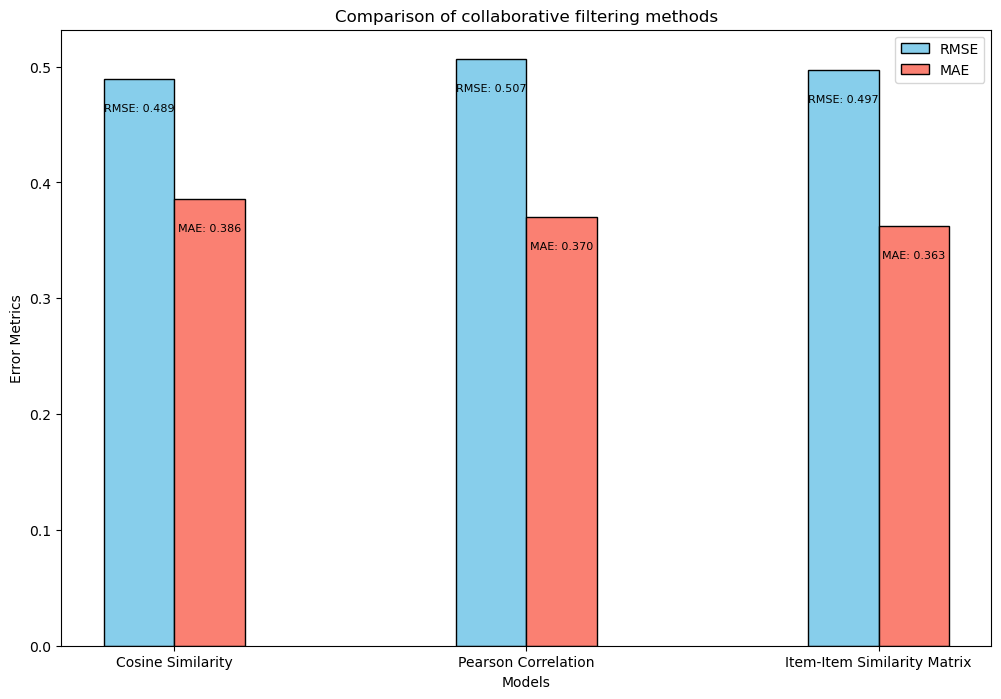

In [ ]:
# Create comparative bar charts
rmse_values = [rmse_cosine, rmse_pearson, rmse_matrix]
mae_values = [mae_cosine, mae_pearson, mae_matrix]
model_names = ['Cosine Similarity', 'Pearson Correlation', 'Item-Item Similarity Matrix']

plot_comparison_bars(rmse_values, mae_values, model_names)